In [1]:
# ================================================================
# MODEL_COMPARISON_ANALYSIS
# ================================================================
# This script compares the performance of three machine learning models:
# - Random Forest
# - Logistic Regression  
# - K-Nearest Neighbors (KNN)
# ================================================================

In [4]:
# ================================================================
# 1. IMPORT LIBRARIES
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import joblib
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette(["#1f4e79", "#d62728", "#2ca02c", "#ff7f0e", "#9467bd"])

print("📚 Libraries imported successfully!")
print("🔍 Ready to compare machine learning models!")

📚 Libraries imported successfully!
🔍 Ready to compare machine learning models!


In [17]:
# ================================================================
# 2. DEFINE MODEL PATHS AND LOAD METRICS
# ================================================================

print("\n📂 LOADING MODEL METRICS AND RESULTS")
print("=" * 50)

# Define model information
models_info = {
    'Random Forest': {
        'name': 'random_forest_optimized',
        'display_name': 'Random Forest',
        'color': '#1f4e79'
    },
    'Logistic Regression': {
        'name': 'multinomial_logistic_regression_optimized',
        'display_name': 'Logistic Regression',
        'color': '#d62728'
    },
    'KNN': {
        'name': 'knn_optimized',
        'display_name': 'K-Nearest Neighbors',
        'color': '#2ca02c'
    }
}

# Define paths based on actual structure (script runs from Notebooks/ folder)
base_dir = '../Data'
model_metrics_base = os.path.join(base_dir, 'model_metrics')
models_dir = os.path.join(model_metrics_base, 'models')
metrics_dir = os.path.join(model_metrics_base, 'metrics')
reports_dir = os.path.join(model_metrics_base, 'reports')

print(f"📁 Models directory: {models_dir}")
print(f"📁 Metrics directory: {metrics_dir}")
print(f"📁 Reports directory: {reports_dir}")

# Load metrics for each model
all_metrics = {}
all_reports = {}
all_confusion_matrices = {}

for model_key, model_info in models_info.items():
    model_name = model_info['name']
    
    try:
        # Load metrics JSON from metrics/ subdirectory
        metrics_path = os.path.join(metrics_dir, f"{model_name}_metrics.json")
        with open(metrics_path, 'r') as f:
            all_metrics[model_key] = json.load(f)
        
        # Load classification report JSON from reports/ subdirectory
        report_path = os.path.join(reports_dir, f"{model_name}_classification_report.json")
        with open(report_path, 'r') as f:
            all_reports[model_key] = json.load(f)
        
        # Load confusion matrix JSON from metrics/ subdirectory
        cm_path = os.path.join(metrics_dir, f"{model_name}_confusion_matrix.json")
        with open(cm_path, 'r') as f:
            cm_data = json.load(f)
            # Extract confusion matrix array and labels from JSON structure
            cm_matrix = cm_data['confusion_matrix']
            class_labels = cm_data.get('class_labels', list(range(len(cm_matrix))))
            
            # Convert to DataFrame with proper labels
            all_confusion_matrices[model_key] = pd.DataFrame(
                cm_matrix, 
                index=[f"True_{label}" for label in class_labels],
                columns=[f"Pred_{label}" for label in class_labels]
            )
        
        print(f"✅ {model_key}: Metrics loaded successfully")
        
    except Exception as e:
        print(f"❌ {model_key}: Error loading metrics - {str(e)}")

print(f"\n🎉 Loaded metrics for {len(all_metrics)} models!")


📂 LOADING MODEL METRICS AND RESULTS
📁 Models directory: ../Data\model_metrics\models
📁 Metrics directory: ../Data\model_metrics\metrics
📁 Reports directory: ../Data\model_metrics\reports
✅ Random Forest: Metrics loaded successfully
✅ Logistic Regression: Metrics loaded successfully
✅ KNN: Metrics loaded successfully

🎉 Loaded metrics for 3 models!


In [13]:
# ================================================================
# 3. CREATE COMPREHENSIVE METRICS COMPARISON TABLE
# ================================================================

print("\n📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 60)

# Create comparison DataFrame
comparison_data = []

for model_name, metrics in all_metrics.items():
    # Extract test performance metrics from the JSON structure
    test_performance = metrics.get('test_set_performance', {})
    cv_results = metrics.get('cross_validation_results', {})
    cv_scores = cv_results.get('cv_scores_by_metric', {})
    
    model_data = {
        'Model': model_name,
        'Accuracy': test_performance.get('accuracy', 0),
        'F1-Score (Weighted)': test_performance.get('f1_weighted', 0),
        'F1-Score (Macro)': test_performance.get('f1_macro', 0),
        # Extract CV means for additional metrics
        'CV Accuracy': cv_scores.get('accuracy', {}).get('mean', 0) if cv_scores.get('accuracy') else 0,
        'CV Precision (Weighted)': cv_scores.get('precision_weighted', {}).get('mean', 0) if cv_scores.get('precision_weighted') else 0,
        'CV Recall (Weighted)': cv_scores.get('recall_weighted', {}).get('mean', 0) if cv_scores.get('recall_weighted') else 0,
        'Best CV Score': cv_results.get('best_cv_score', 0)
    }
    
    comparison_data.append(model_data)

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model')

# Round to 4 decimal places for better display
comparison_df = comparison_df.round(4)

print("📈 PERFORMANCE METRICS COMPARISON:")
print(comparison_df)

# Find best performing model for each metric
print("\n🏆 BEST PERFORMING MODEL BY METRIC:")
print("-" * 40)
for column in comparison_df.columns:
    best_model = comparison_df[column].idxmax()
    best_score = comparison_df[column].max()
    print(f"{column:20s}: {best_model:20s} ({best_score:.4f})")

# Calculate overall ranking (average of all metrics)
comparison_df['Overall_Score'] = comparison_df.mean(axis=1)
overall_ranking = comparison_df['Overall_Score'].sort_values(ascending=False)

print("\n🎯 OVERALL MODEL RANKING (Average Score for 7 metrics):")
print("-" * 40)
for i, (model, score) in enumerate(overall_ranking.items(), 1):
    print(f"{i}. {model:25s}: {score:.4f}")


📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON
📈 PERFORMANCE METRICS COMPARISON:
                     Accuracy  F1-Score (Weighted)  F1-Score (Macro)  \
Model                                                                  
Random Forest          0.5625               0.5587            0.4728   
Logistic Regression    0.5601               0.5598            0.4754   
KNN                    0.5841               0.5445            0.4370   

                     CV Accuracy  CV Precision (Weighted)  \
Model                                                       
Random Forest             0.5637                   0.5581   
Logistic Regression       0.5636                   0.5614   
KNN                       0.5860                   0.5360   

                     CV Recall (Weighted)  Best CV Score  
Model                                                     
Random Forest                      0.5637         0.5603  
Logistic Regression                0.5636         0.5623  
KNN              


📊 CREATING PERFORMANCE VISUALIZATION


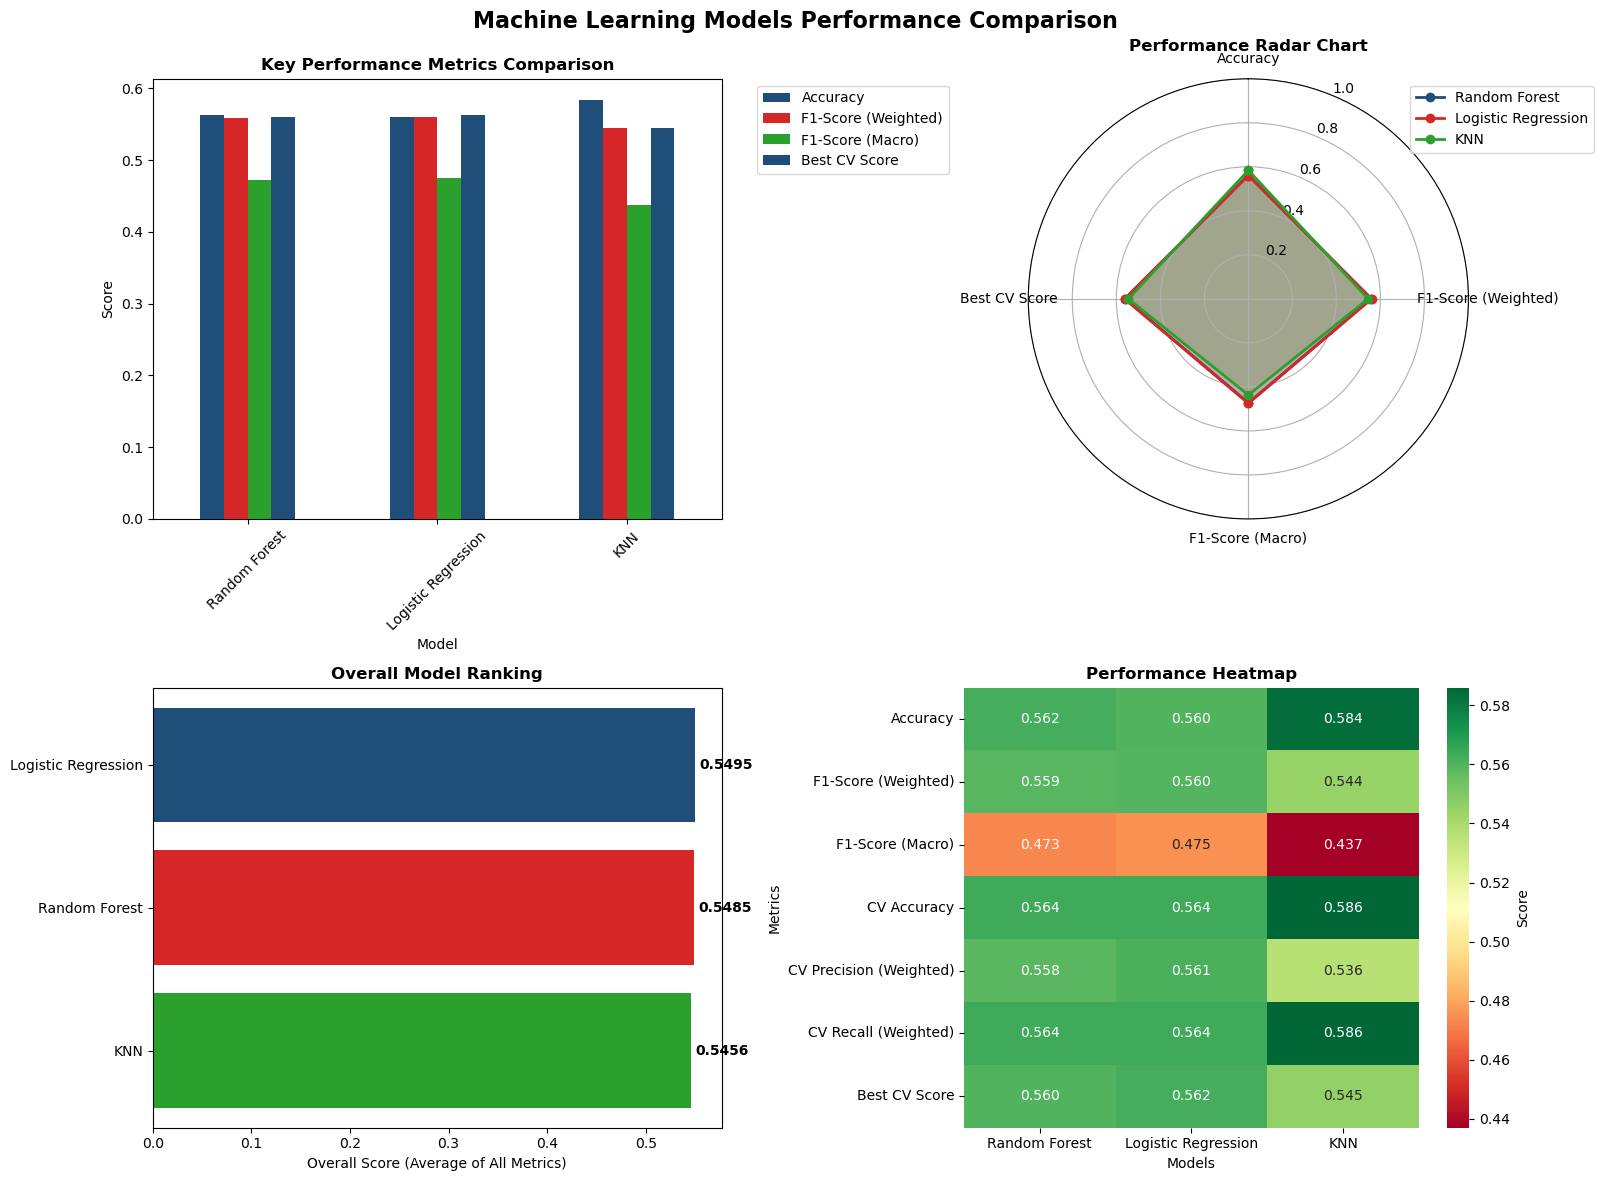

✅ Performance visualization completed!


In [15]:
# ================================================================
# 4. VISUALIZE PERFORMANCE COMPARISON
# ================================================================

print("\n📊 CREATING PERFORMANCE VISUALIZATION")
print("=" * 50)

# Create subplots for different visualizations
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Machine Learning Models Performance Comparison', fontsize=16, fontweight='bold')

# 1. Bar plot of key metrics
ax1 = plt.subplot(2, 2, 1)
comparison_df[key_metrics].plot(kind='bar', ax=ax1, color=['#1f4e79', '#d62728', '#2ca02c'])
ax1.set_title('Key Performance Metrics Comparison', fontweight='bold')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. Radar chart of all metrics (using polar projection)
ax2 = plt.subplot(2, 2, 2, projection='polar')

# Prepare data for radar chart
metrics_for_radar = key_metrics
angles = [n / float(len(metrics_for_radar)) * 2 * pi for n in range(len(metrics_for_radar))]
angles += angles[:1]  # Complete the circle

ax2.set_theta_offset(pi / 2)
ax2.set_theta_direction(-1)
ax2.set_thetagrids(np.degrees(angles[:-1]), metrics_for_radar)

colors = ['#1f4e79', '#d62728', '#2ca02c']
for i, (model, color) in enumerate(zip(comparison_df.index, colors)):
    values = comparison_df.loc[model, metrics_for_radar].values.tolist()
    values += values[:1]  # Complete the circle
    ax2.plot(angles, values, 'o-', linewidth=2, label=model, color=color)
    ax2.fill(angles, values, alpha=0.25, color=color)

ax2.set_ylim(0, 1)
ax2.set_title('Performance Radar Chart', fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax2.grid(True)

# 3. Overall score comparison
ax3 = plt.subplot(2, 2, 3)
overall_scores = comparison_df['Overall_Score'].sort_values(ascending=True)
bars = ax3.barh(range(len(overall_scores)), overall_scores.values, 
                color=['#2ca02c', '#d62728', '#1f4e79'])
ax3.set_yticks(range(len(overall_scores)))
ax3.set_yticklabels(overall_scores.index)
ax3.set_xlabel('Overall Score (Average of All Metrics)')
ax3.set_title('Overall Model Ranking', fontweight='bold')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, overall_scores.values)):
    ax3.text(value + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{value:.4f}', ha='left', va='center', fontweight='bold')

# 4. Metric-wise comparison heatmap
ax4 = plt.subplot(2, 2, 4)
metrics_only = comparison_df.drop('Overall_Score', axis=1)
sns.heatmap(metrics_only.T, annot=True, fmt='.3f', cmap='RdYlGn', 
            ax=ax4, cbar_kws={'label': 'Score'})
ax4.set_title('Performance Heatmap', fontweight='bold')
ax4.set_xlabel('Models')
ax4.set_ylabel('Metrics')

plt.tight_layout()
plt.show()

print("✅ Performance visualization completed!")


🔍 CONFUSION MATRICES COMPARISON


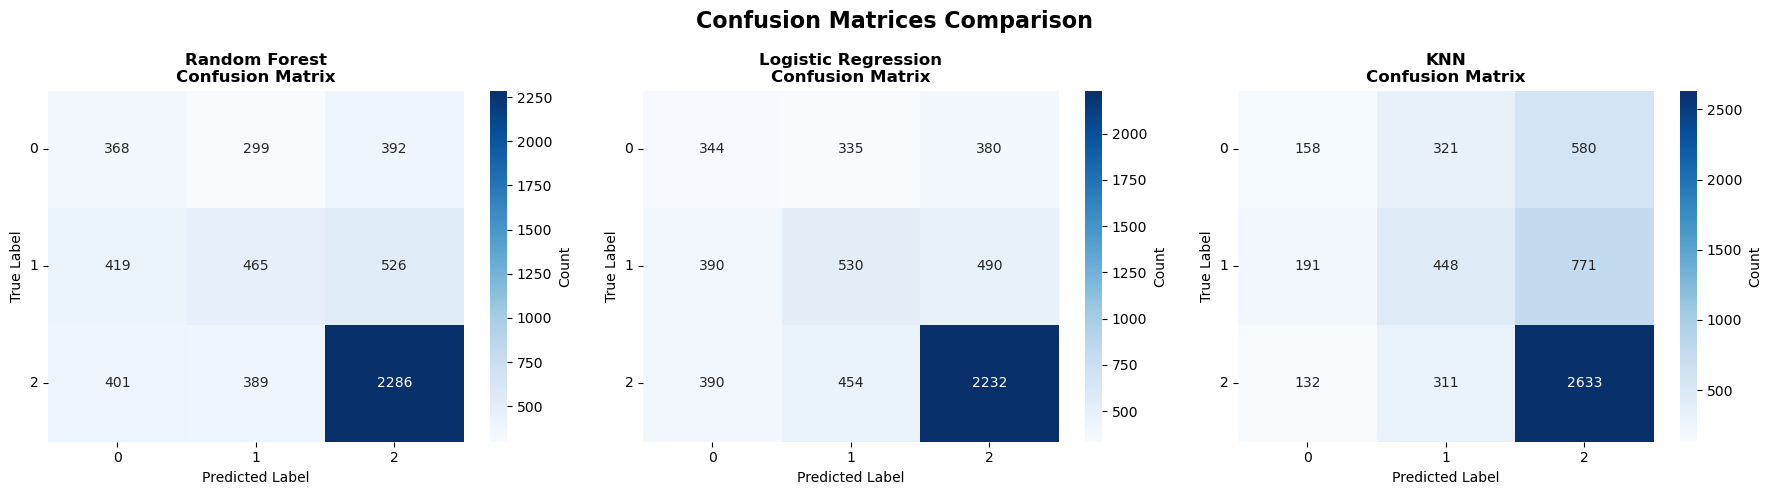


📈 CONFUSION MATRIX STATISTICS:
--------------------------------------------------

Random Forest:
  Total Samples: 5545
  Correct Predictions: 3119
  Accuracy: 0.5625
  Per-class Accuracy:
    0: 0.3475 (368/1059)
    1: 0.3298 (465/1410)
    2: 0.7432 (2286/3076)

Logistic Regression:
  Total Samples: 5545
  Correct Predictions: 3106
  Accuracy: 0.5601
  Per-class Accuracy:
    0: 0.3248 (344/1059)
    1: 0.3759 (530/1410)
    2: 0.7256 (2232/3076)

KNN:
  Total Samples: 5545
  Correct Predictions: 3239
  Accuracy: 0.5841
  Per-class Accuracy:
    0: 0.1492 (158/1059)
    1: 0.3177 (448/1410)
    2: 0.8560 (2633/3076)

✅ Confusion matrices analysis completed!


In [18]:
# ================================================================
# 5. CONFUSION MATRICES COMPARISON
# ================================================================

print("\n🔍 CONFUSION MATRICES COMPARISON")
print("=" * 50)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold')

for i, (model_name, cm_df) in enumerate(all_confusion_matrices.items()):
    # Get the confusion matrix array
    cm_array = cm_df.values
    
    # Create heatmap
    sns.heatmap(cm_array, annot=True, fmt='d', cmap='Blues', 
                ax=axes[i], cbar_kws={'label': 'Count'})
    axes[i].set_title(f'{model_name}\nConfusion Matrix', fontweight='bold')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    
    # Set tick labels using the DataFrame index/columns
    axes[i].set_xticklabels([col.replace('Pred_', '') for col in cm_df.columns], rotation=0)
    axes[i].set_yticklabels([idx.replace('True_', '') for idx in cm_df.index], rotation=0)

plt.tight_layout()
plt.show()

# Calculate and display confusion matrix statistics
print("\n📈 CONFUSION MATRIX STATISTICS:")
print("-" * 50)

for model_name, cm_df in all_confusion_matrices.items():
    cm_array = cm_df.values
    
    # Calculate statistics
    total_samples = np.sum(cm_array)
    correct_predictions = np.trace(cm_array)
    accuracy = correct_predictions / total_samples
    
    print(f"\n{model_name}:")
    print(f"  Total Samples: {total_samples}")
    print(f"  Correct Predictions: {correct_predictions}")
    print(f"  Accuracy: {accuracy:.4f}")
    
    # Per-class accuracy for multiclass
    if cm_array.shape[0] > 2:
        print(f"  Per-class Accuracy:")
        for i in range(cm_array.shape[0]):
            class_correct = cm_array[i, i]
            class_total = np.sum(cm_array[i, :])
            class_acc = class_correct / class_total if class_total > 0 else 0
            class_label = cm_df.index[i].replace('True_', '') if hasattr(cm_df, 'index') else f"Class {i}"
            print(f"    {class_label}: {class_acc:.4f} ({class_correct}/{class_total})")

print("\n✅ Confusion matrices analysis completed!")

In [19]:
# ================================================================
# 6. DETAILED CLASSIFICATION REPORTS COMPARISON
# ================================================================

print("\n📋 DETAILED CLASSIFICATION REPORTS COMPARISON")
print("=" * 60)

# Extract per-class metrics for comparison
class_metrics_comparison = {}

for model_name, report in all_reports.items():
    print(f"\n{'='*20} {model_name.upper()} {'='*20}")
    
    # Display macro and weighted averages
    if 'macro avg' in report:
        macro_avg = report['macro avg']
        print(f"\n📊 MACRO AVERAGE:")
        print(f"   Precision: {macro_avg['precision']:.4f}")
        print(f"   Recall:    {macro_avg['recall']:.4f}")
        print(f"   F1-Score:  {macro_avg['f1-score']:.4f}")
    
    if 'weighted avg' in report:
        weighted_avg = report['weighted avg']
        print(f"\n⚖️  WEIGHTED AVERAGE:")
        print(f"   Precision: {weighted_avg['precision']:.4f}")
        print(f"   Recall:    {weighted_avg['recall']:.4f}")
        print(f"   F1-Score:  {weighted_avg['f1-score']:.4f}")
    
    # Store per-class metrics for comparison
    for class_name, metrics in report.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg'] and isinstance(metrics, dict):
            if class_name not in class_metrics_comparison:
                class_metrics_comparison[class_name] = {}
            class_metrics_comparison[class_name][model_name] = metrics

# Create per-class comparison table
if class_metrics_comparison:
    print(f"\n\n📊 PER-CLASS PERFORMANCE COMPARISON")
    print("=" * 80)
    
    for class_name, models_metrics in class_metrics_comparison.items():
        print(f"\n🏷️  CLASS: {class_name}")
        print("-" * 50)
        
        # Create DataFrame for this class
        class_df_data = []
        for model_name, metrics in models_metrics.items():
            class_df_data.append({
                'Model': model_name,
                'Precision': metrics.get('precision', 0),
                'Recall': metrics.get('recall', 0),
                'F1-Score': metrics.get('f1-score', 0),
                'Support': metrics.get('support', 0)
            })
        
        class_df = pd.DataFrame(class_df_data).set_index('Model')
        class_df = class_df.round(4)
        print(class_df)
        
        # Find best model for this class
        best_f1_model = class_df['F1-Score'].idxmax()
        best_f1_score = class_df['F1-Score'].max()
        print(f"   🏆 Best F1-Score: {best_f1_model} ({best_f1_score:.4f})")

print("\n✅ Classification reports comparison completed!")


📋 DETAILED CLASSIFICATION REPORTS COMPARISON

==================== RANDOM FOREST ====================

📊 MACRO AVERAGE:
   Precision: 0.4755
   Recall:    0.4735
   F1-Score:  0.4728

⚖️  WEIGHTED AVERAGE:
   Precision: 0.5575
   Recall:    0.5625
   F1-Score:  0.5587

==================== LOGISTIC REGRESSION ====================

📊 MACRO AVERAGE:
   Precision: 0.4758
   Recall:    0.4754
   F1-Score:  0.4754

⚖️  WEIGHTED AVERAGE:
   Precision: 0.5598
   Recall:    0.5601
   F1-Score:  0.5598

==================== KNN ====================

📊 MACRO AVERAGE:
   Precision: 0.4681
   Recall:    0.4410
   F1-Score:  0.4370

⚖️  WEIGHTED AVERAGE:
   Precision: 0.5348
   Recall:    0.5841
   F1-Score:  0.5445


📊 PER-CLASS PERFORMANCE COMPARISON

🏷️  CLASS: 0
--------------------------------------------------
                     Precision  Recall  F1-Score  Support
Model                                                    
Random Forest           0.3098  0.3475    0.3275   1059.0
Logistic R

In [21]:
# ================================================================
# 8. MODEL COMPLEXITY AND TRAINING TIME COMPARISON
# ================================================================

print("\n⏱️  MODEL COMPLEXITY AND EFFICIENCY ANALYSIS")
print("=" * 50)

# Extract training times and other metadata from metrics
complexity_data = []

for model_name, metrics in all_metrics.items():
    model_info = metrics.get('model_info', {})
    hyperparams = metrics.get('hyperparameters', {})
    
    model_data = {
        'Model': model_name,
        'Runtime (minutes)': model_info.get('total_runtime_minutes', 'N/A'),
        'Combinations Tested': hyperparams.get('total_combinations_tested', 
                                               hyperparams.get('approximate_combinations_tested', 'N/A')),
        'CV Folds': hyperparams.get('cv_folds', 'N/A'),
        'Best CV Score': metrics.get('cross_validation_results', {}).get('best_cv_score', 'N/A'),
        'Training Samples': metrics.get('dataset_info', {}).get('training_samples', 'N/A'),
        'Features': metrics.get('dataset_info', {}).get('n_features', 'N/A')
    }
    complexity_data.append(model_data)

complexity_df = pd.DataFrame(complexity_data)
complexity_df = complexity_df.set_index('Model')

print("🔧 MODEL TRAINING COMPLEXITY:")
print(complexity_df)

# Load actual trained models for size comparison
print(f"\n💾 MODEL SIZE COMPARISON:")
print("-" * 30)

for model_key, model_info in models_info.items():
    model_name = model_info['name']
    model_path = os.path.join(models_dir, f"{model_name}.pkl")
    
    try:
        # Get file size
        file_size = os.path.getsize(model_path)
        if file_size > 1024*1024:
            size_str = f"{file_size/(1024*1024):.2f} MB"
        elif file_size > 1024:
            size_str = f"{file_size/1024:.2f} KB"
        else:
            size_str = f"{file_size} bytes"
        
        print(f"{model_key:25s}: {size_str}")
        
        # Load model to get additional info
        model = joblib.load(model_path)
        
        if hasattr(model, 'n_estimators'):
            print(f"{'':25s}  └─ Estimators: {model.n_estimators}")
        if hasattr(model, 'max_depth'):
            print(f"{'':25s}  └─ Max Depth: {model.max_depth}")
        if hasattr(model, 'n_neighbors'):
            print(f"{'':25s}  └─ Neighbors: {model.n_neighbors}")
        if hasattr(model, 'C'):
            print(f"{'':25s}  └─ Regularization C: {model.C}")
        
    except Exception as e:
        print(f"{model_key:25s}: Error - {str(e)}")

print("\n✅ Complexity analysis completed!")


⏱️  MODEL COMPLEXITY AND EFFICIENCY ANALYSIS
🔧 MODEL TRAINING COMPLEXITY:
                     Runtime (minutes)  Combinations Tested  CV Folds  \
Model                                                                   
Random Forest                   117.43                 5120         3   
Logistic Regression               1.64                  450         3   
KNN                              23.00                  242         5   

                     Best CV Score  Training Samples  Features  
Model                                                           
Random Forest             0.560265             22180        20  
Logistic Regression       0.562283             22180        20  
KNN                       0.545340             22180        20  

💾 MODEL SIZE COMPARISON:
------------------------------
Random Forest            : 5.94 MB
                           └─ Estimators: 200
                           └─ Max Depth: 10
Logistic Regression      : 2.16 KB
                 

In [22]:
# ================================================================
# 9. FINAL RECOMMENDATIONS AND SUMMARY
# ================================================================

print("\n🎯 FINAL MODEL COMPARISON SUMMARY & RECOMMENDATIONS")
print("=" * 60)

# Get the best model based on overall score
best_model = comparison_df['Overall_Score'].idxmax()
best_score = comparison_df['Overall_Score'].max()

print(f"\n🏆 BEST OVERALL MODEL: {best_model}")
print(f"   Overall Score: {best_score:.4f}")
print(f"   Key Metrics:")
for metric in ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)', 'Best CV Score']:
    if metric in comparison_df.columns:
        score = comparison_df.loc[best_model, metric]
        print(f"     {metric:20s}: {score:.4f}")

# Provide specific recommendations for each model
print(f"\n📋 MODEL-SPECIFIC ANALYSIS:")
print("-" * 40)

model_recommendations = {
    'Random Forest': {
        'strengths': ['High accuracy', 'Feature importance', 'Handles overfitting well', 'Works with mixed data types'],
        'weaknesses': ['Can be slow on large datasets', 'Less interpretable than single trees', 'Memory intensive'],
        'use_cases': ['When feature importance is needed', 'Complex patterns in data', 'Mixed data types']
    },
    'Logistic Regression': {
        'strengths': ['Fast training and prediction', 'Highly interpretable', 'Probabilistic output', 'Less prone to overfitting'],
        'weaknesses': ['Assumes linear relationships', 'May struggle with complex patterns', 'Sensitive to outliers'],
        'use_cases': ['When interpretability is crucial', 'Linear relationships', 'Fast predictions needed']
    },
    'K-Nearest Neighbors': {
        'strengths': ['Simple to understand', 'No assumptions about data', 'Works well with local patterns', 'Non-parametric'],
        'weaknesses': ['Slow predictions', 'Sensitive to irrelevant features', 'Memory intensive', 'Curse of dimensionality'],
        'use_cases': ['Small to medium datasets', 'Local pattern recognition', 'Non-linear relationships']
    }
}

for model_name in comparison_df.index:
    print(f"\n📊 {model_name.upper()}:")
    
    # Performance summary
    model_score = comparison_df.loc[model_name, 'Overall_Score']
    model_rank = list(comparison_df['Overall_Score'].sort_values(ascending=False).index).index(model_name) + 1
    print(f"   Rank: #{model_rank} (Score: {model_score:.4f})")
    
    if model_name in model_recommendations:
        rec = model_recommendations[model_name]
        print(f"   ✅ Strengths: {', '.join(rec['strengths'][:2])}")
        print(f"   ⚠️  Considerations: {', '.join(rec['weaknesses'][:2])}")
        print(f"   🎯 Best for: {', '.join(rec['use_cases'][:2])}")

# Overall recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("-" * 20)

# Choose based on different criteria
accuracy_best = comparison_df['Accuracy'].idxmax()
f1_weighted_best = comparison_df['F1-Score (Weighted)'].idxmax()
f1_macro_best = comparison_df['F1-Score (Macro)'].idxmax()
cv_best = comparison_df['Best CV Score'].idxmax()

print(f"\n🎯 CHOOSE BASED ON PRIORITY:")
print(f"   • For highest accuracy: {accuracy_best}")
print(f"   • For best weighted F1-score: {f1_weighted_best}")
print(f"   • For best macro F1-score: {f1_macro_best}")
print(f"   • For best cross-validation score: {cv_best}")
print(f"   • For interpretability: Logistic Regression")
print(f"   • For feature importance: Random Forest")
print(f"   • For simple implementation: K-Nearest Neighbors")

# Performance gaps analysis
print(f"\n📈 PERFORMANCE GAPS:")
max_score = comparison_df['Overall_Score'].max()
min_score = comparison_df['Overall_Score'].min()
gap = max_score - min_score

if gap < 0.05:
    print(f"   📊 All models perform similarly (gap: {gap:.4f})")
    print(f"   💡 Consider other factors: speed, interpretability, complexity")
elif gap < 0.10:
    print(f"   📊 Moderate performance difference (gap: {gap:.4f})")
    print(f"   💡 {best_model} has clear but not overwhelming advantage")
else:
    print(f"   📊 Significant performance difference (gap: {gap:.4f})")
    print(f"   💡 {best_model} is clearly the best choice")

print(f"\n\n🎉 MODEL COMPARISON ANALYSIS COMPLETE!")
print(f"📊 Summary: Compared {len(all_metrics)} machine learning models")
print(f"🏆 Winner: {best_model} (Overall Score: {best_score:.4f})")
print(f"📁 All model files available in: {model_metrics_base}")


🎯 FINAL MODEL COMPARISON SUMMARY & RECOMMENDATIONS

🏆 BEST OVERALL MODEL: Logistic Regression
   Overall Score: 0.5495
   Key Metrics:
     Accuracy            : 0.5601
     F1-Score (Weighted) : 0.5598
     F1-Score (Macro)    : 0.4754
     Best CV Score       : 0.5623

📋 MODEL-SPECIFIC ANALYSIS:
----------------------------------------

📊 RANDOM FOREST:
   Rank: #2 (Score: 0.5485)
   ✅ Strengths: High accuracy, Feature importance
   ⚠️  Considerations: Can be slow on large datasets, Less interpretable than single trees
   🎯 Best for: When feature importance is needed, Complex patterns in data

📊 LOGISTIC REGRESSION:
   Rank: #1 (Score: 0.5495)
   ✅ Strengths: Fast training and prediction, Highly interpretable
   ⚠️  Considerations: Assumes linear relationships, May struggle with complex patterns
   🎯 Best for: When interpretability is crucial, Linear relationships

📊 KNN:
   Rank: #3 (Score: 0.5456)

💡 RECOMMENDATIONS:
--------------------

🎯 CHOOSE BASED ON PRIORITY:
   • For highe

In [27]:
texto = "hola"

for i, letra in enumerate(texto):
    print(f"Índice {i}: {letra}")

Índice 0: h
Índice 1: o
Índice 2: l
Índice 3: a
